In [143]:
import pandas as pd
import numpy as np

In [144]:
bank = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/bank-full.csv')

In [145]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


There are 17 columns/features (including y variable) however we only need few of them in terms to run the model. They are as below, 

### age, marital, default, balance, housing, loan, duration, campaign, pdays, previous, poutcome, y 

### Dropping the unwanted column 

In [146]:
bank.drop(bank.columns[1:2], inplace=True,axis = 1)
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [147]:
bank.drop(bank.columns[2:3], inplace=True,axis = 1)
bank.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [148]:
bank.drop(bank.columns[6:9], inplace=True,axis = 1)
bank.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,married,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,single,no,29,yes,no,151,1,-1,0,unknown,no
2,33,married,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,married,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,single,no,1,no,no,198,1,-1,0,unknown,no


In [149]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   marital   45211 non-null  object
 2   default   45211 non-null  object
 3   balance   45211 non-null  int64 
 4   housing   45211 non-null  object
 5   loan      45211 non-null  object
 6   duration  45211 non-null  int64 
 7   campaign  45211 non-null  int64 
 8   pdays     45211 non-null  int64 
 9   previous  45211 non-null  int64 
 10  poutcome  45211 non-null  object
 11  y         45211 non-null  object
dtypes: int64(6), object(6)
memory usage: 4.1+ MB


### We have 5 catogorical columns which we need to convert into numeric one by One Hot Encoding method 
     however before converting it let's first devide the data set into X & Y variables 

In [150]:
# Deviding our data into input and output variabales
X = bank.iloc[:,:11]
Y = bank.iloc[:,11]

In [151]:
X.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,married,no,2143,yes,no,261,1,-1,0,unknown
1,44,single,no,29,yes,no,151,1,-1,0,unknown
2,33,married,no,2,yes,yes,76,1,-1,0,unknown
3,47,married,no,1506,yes,no,92,1,-1,0,unknown
4,33,single,no,1,no,no,198,1,-1,0,unknown


In [152]:
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [153]:
#Creating dummy variable for marital column
X2=pd.get_dummies(X,columns=['marital'])

#Creating dummy variable for default column
X3=pd.get_dummies(X2,columns=['default'])

#Creating dummy variable for housing column
X4=pd.get_dummies(X3,columns=['housing'])

#Creating dummy variable for loan column
X5=pd.get_dummies(X4,columns=['loan'])

#Creating dummy variable for poutcome column
X6=pd.get_dummies(X5,columns=['poutcome'])

In [154]:
X6.head()

,age,balance,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
2,33,2,76,1,-1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,1,1,0,1,0,1,0,0,0,0,1


In [155]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   balance           45211 non-null  int64
 2   duration          45211 non-null  int64
 3   campaign          45211 non-null  int64
 4   pdays             45211 non-null  int64
 5   previous          45211 non-null  int64
 6   marital_divorced  45211 non-null  uint8
 7   marital_married   45211 non-null  uint8
 8   marital_single    45211 non-null  uint8
 9   default_no        45211 non-null  uint8
 10  default_yes       45211 non-null  uint8
 11  housing_no        45211 non-null  uint8
 12  housing_yes       45211 non-null  uint8
 13  loan_no           45211 non-null  uint8
 14  loan_yes          45211 non-null  uint8
 15  poutcome_failure  45211 non-null  uint8
 16  poutcome_other    45211 non-null  uint8
 17  poutcome_success  45211 non-nul

### Now let's convert the variable Y into numeric by Lable encoding method

In [156]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

In [157]:
print(Y)

[0 0 0 ... 1 0 0]


In [158]:
Y1 = pd.DataFrame(Y)

In [159]:
Y1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [160]:
Y1.shape

(45211, 1)

In [161]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=45000)

In [162]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X6,Y1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
#Predict for X dataset
y_pred = classifier.predict(X6)

In [164]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [165]:
y_pred.shape

(45211,)

In [166]:
y_pred_df = pd.DataFrame({'actual': Y, 'predicted_prob': y_pred})

In [167]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [168]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y1,y_pred)
print (confusion_matrix)

[[39184   738]
 [ 4196  1093]]


In [169]:
((39184+1093)/(39184+738+4196+1093))*100

89.0867266815598

In [170]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y1,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [171]:
#ROC Curve 
classifier.predict_proba(X6)[:,1]

array([0.0427701 , 0.03649938, 0.03136862, ..., 0.72174829, 0.13739238,
       0.12829772])

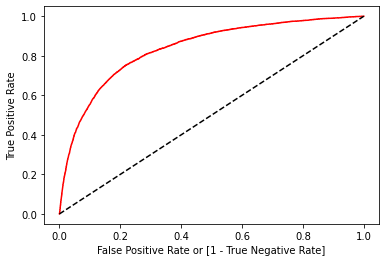

In [174]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y1, classifier.predict_proba(X6)[:,1])

auc = roc_auc_score(Y1, y_pred)
auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [173]:
auc

0.5940846372869902